## Exercicio 1
Você trabalha como analista de dados para a empresa citada
anteriormente. As informações sobre o consumo de eletricidade são mantidas em um sistema baseado em nuvem, no site da Korea Electric Power Corporation, e as perspectivas sobre dados diários, mensais e anuais são calculadas e mostradas.
O seu primeiro objetivo é realizar uma análise 
estatística básica do consumo de energia para entender melhor os dados e fornecer insights iniciais sobre o comportamento do consumo de energia.

In [1]:
# importar as bibliotecas 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# passo 1 carregar os dados
data = pd.read_csv('consumo_energia.csv')
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
data.shape

(35040, 11)

In [4]:
# passo 2 - calcular estatisticas basicas
media_uso = data['Usage_kWh'].mean() # media de uso
media_uso

np.float64(27.386892408675795)

In [5]:
# mediana
media_uso = data['Usage_kWh'].median() # mediana de uso
media_uso

np.float64(4.57)

In [6]:
media_uso = data['Usage_kWh'].mode() # moda de uso
media_uso

0    3.06
Name: Usage_kWh, dtype: float64

In [7]:
variancia = data['Usage_kWh'].var() # variancia de uso
variancia

np.float64(1118.5265340538938)

In [8]:
desvio = data['Usage_kWh'].std() # desvio padrão
desvio

np.float64(33.44437970801513)

In [9]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [3]:
import statsmodels.api as sm
from scipy import stats

In [11]:
data.info()  # verificando dados ausentes ou nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [12]:
data.isnull().sum()  # verificando dados nulos

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

Text(0, 0.5, 'Frequencia')

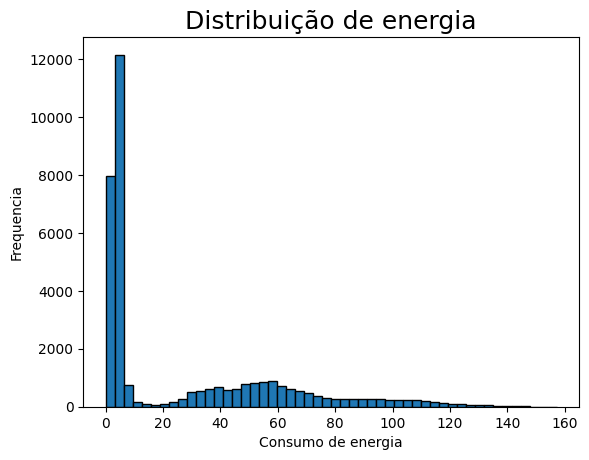

In [13]:
# analisar a distribuiçao de energia
# histograma e quiquadrado
plt.hist(data['Usage_kWh'],bins=50,edgecolor='black')
plt.title('Distribuição de energia',fontsize=18)
plt.xlabel('Consumo de energia')
plt.ylabel('Frequencia')

Text(0.5, 1.0, 'QuiQuadrado Plot consumo de energia')

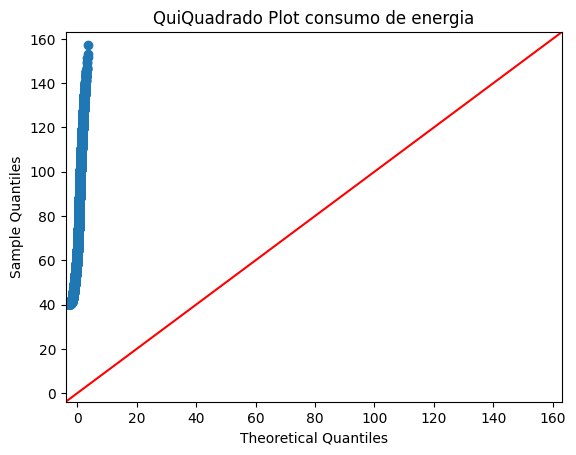

In [14]:
sm.qqplot(data.loc[data['Usage_kWh'] > 40,'Usage_kWh'],line='45')
plt.title('QuiQuadrado Plot consumo de energia')


## Analisar a relação entre consumo de energia e emissão de CO2

In [15]:
# Criar um grafico de dispersão entre as variaveis

In [4]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

Text(0, 0.5, 'Consumo de CO2')

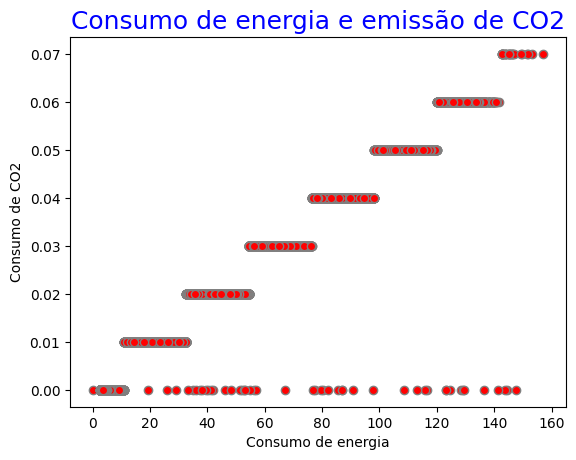

In [21]:
plt.scatter(data['Usage_kWh'], data['CO2(tCO2)'],edgecolor='gray',color='red')
plt.title('Consumo de energia e emissão de CO2',fontsize=18,color='blue')
plt.xlabel('Consumo de energia')
plt.ylabel('Consumo de CO2')

In [5]:
data['CO2(tCO2)'].value_counts(normalize=True)
# normalize transforma em %

CO2(tCO2)
0.00    0.599030
0.02    0.132506
0.03    0.121604
0.04    0.052340
0.01    0.043151
0.05    0.038898
0.06    0.011701
0.07    0.000771
Name: proportion, dtype: float64

In [19]:
# criar serie temporal do consumo de energia ao longo do tempo

Text(0, 0.5, 'Consumo de energia(kwh/m)')

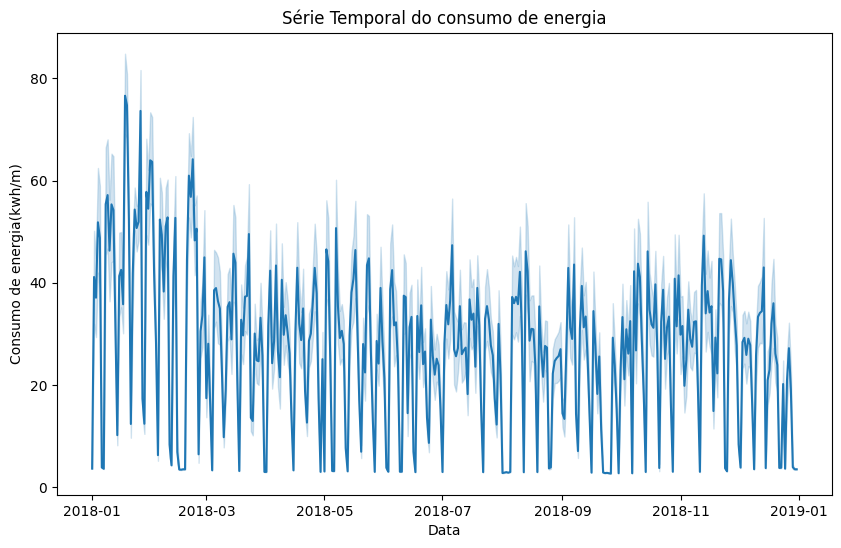

In [7]:
plt.figure(figsize=(10,6))
data['data_dia'] = pd.to_datetime(data['date'].apply(lambda x: x[:10]),format='%d/%m/%Y')
sns.lineplot(data= data, x = data['data_dia'], y =data['Usage_kWh'])
plt.title('Série Temporal do consumo de energia')
plt.xlabel('Data')
plt.ylabel('Consumo de energia(kwh/m)')


In [ ]:
# Passo 3 - Aplicar Kernel Density Estimation (KDE
